<a href="https://colab.research.google.com/github/Hayzer3/cp-covid/blob/main/cpIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19 no Brasil**

Escolhemos o dataset Corona Virus Brazil (https://www.kaggle.com/unanimad/corona-virus-brazil) de 2021-05-23, ele contem dados sobre o número de casos de covid no Brasil.

**Objetivo da Análise:**
O objetivo desta análise é explorar o dataset Corona Virus Brazil para entender a evolução da pandemia de COVID-19 no Brasil, identificando padrões temporais, distribuição geográfica por estados e a taxa de mortalidade por estados. Através de visualizações como gráficos de evolução temporal, comparações entre regiões, vamos analisar como a doença se espalhou pelo país, quais estados foram mais afetados e como os números evoluíram ao longo do tempo.

**Aluno(s):**

[Lucas Nunes Soares] - RM: [566503]

[Camily Vitoria Pereira Maciel] - RM: [RM566520]

[Gustavo Pinheiro de Oliveira] - RM: [RM566358]

**Questao levantada: Como evoluiu a pandemia de COVID-19 no Brasil?**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import kagglehub
import os

In [ ]:
# Download latest version
path = kagglehub.dataset_download("unanimad/corona-virus-brazil")

df = pd.read_csv(f"{path}/brazil_covid19.csv")

Using Colab cache for faster access to the 'corona-virus-brazil' dataset.
Path to dataset files: /kaggle/input/corona-virus-brazil


In [ ]:
df.head()


,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0.0,0
1,2020-02-25,Centro-Oeste,GO,0.0,0
2,2020-02-25,Centro-Oeste,MS,0.0,0
3,2020-02-25,Centro-Oeste,MT,0.0,0
4,2020-02-25,Nordeste,AL,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12258 entries, 0 to 12257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    12258 non-null  object 
 1   region  12258 non-null  object 
 2   state   12258 non-null  object 
 3   cases   12258 non-null  float64
 4   deaths  12258 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 479.0+ KB


In [ ]:
df.describe()

,cases,deaths
count,1.225800e+04,12258.000000
mean,2.085151e+05,5701.935308
std,3.281497e+05,10238.310905
min,0.000000e+00,0.000000
25%,2.184225e+04,558.250000
50%,1.065500e+05,2627.000000
75%,2.524558e+05,6534.000000
max,3.188105e+06,107614.000000


In [ ]:
print("Valores faltantes por coluna:")
df.isnull().sum()

Valores faltantes por coluna:


,0
date,0
region,0
state,0
cases,0
deaths,0


**Como evoluiu a curva de casos e mortes da COVID-19 no Brasil ao longo do tempo?**

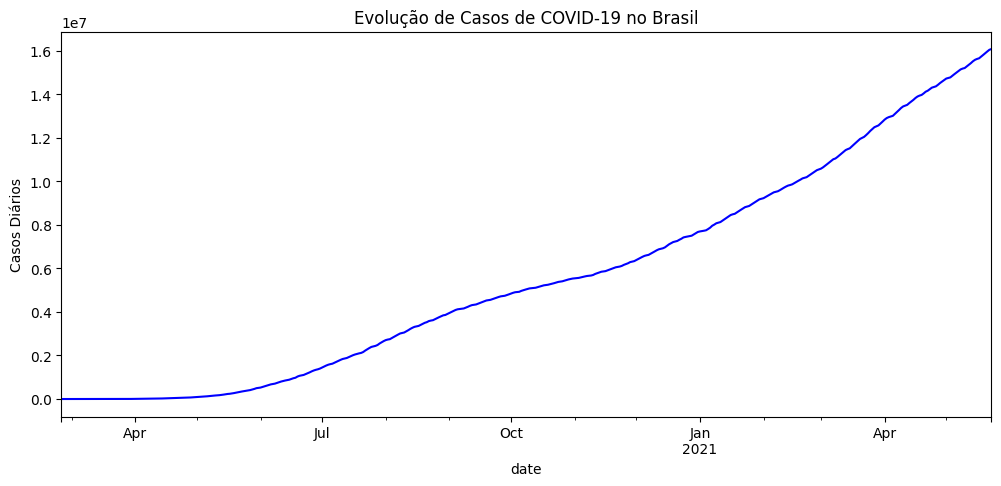

In [ ]:
# analise temporal
plt.figure(figsize=(12,5))
daily_cases = df.groupby('date')['cases'].sum()
daily_cases.plot(color='blue')
plt.title('Evolução de Casos de COVID-19 no Brasil')
plt.ylabel('Casos Diários')
plt.show()


Quais estados foram mais afetados pela pandemia em termos de casos e mortes?

/tmp/ipython-input-2836101987.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


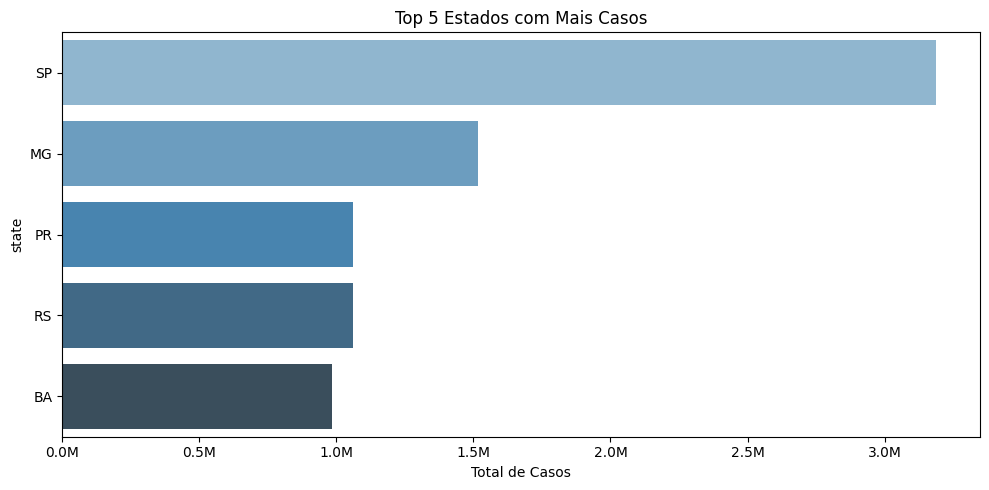

In [ ]:
plt.figure(figsize=(10,5))
top5 = (
    df.groupby('state')['cases']
      .max()
      .nlargest(5)
)
sns.barplot(
    x=top5.values, y=top5.index,
    palette='Blues_d', legend=False
)
plt.title('Top 5 Estados com Mais Casos')
plt.xlabel('Total de Casos')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

**Qual a taxa de mortalidade por estado?**

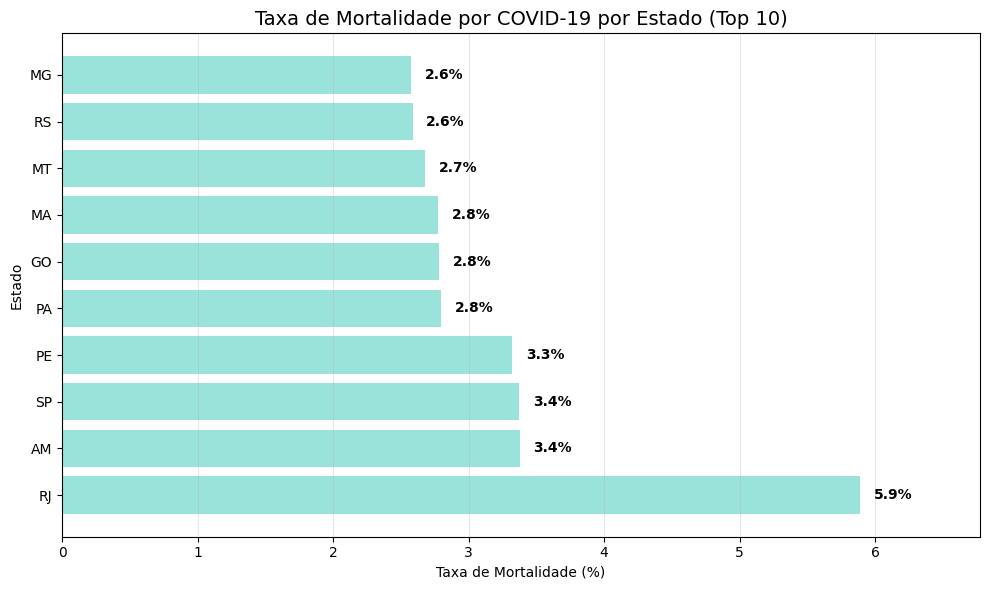

In [ ]:
top_mortalidade = (
    df.groupby('state')[['cases', 'deaths']].max()
      .assign(taxa=lambda x: (x.deaths / x.cases) * 100)
      .sort_values('taxa', ascending=False)
      .head(10)['taxa']
)

plt.figure(figsize=(10,6))
bars = plt.barh(top_mortalidade.index, top_mortalidade, color='#9AE3DB')

for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', va='center', ha='left', fontweight='bold')

plt.title('Taxa de Mortalidade por COVID-19 por Estado (Top 10)', fontsize=14)
plt.xlabel('Taxa de Mortalidade (%)')
plt.ylabel('Estado')
plt.grid(axis='x', alpha=0.3)
plt.xlim(0, top_mortalidade.max() * 1.15)
plt.tight_layout()
plt.show()

Como se distribuiu geograficamente o impacto da pandemia entre as regiões do Brasil?

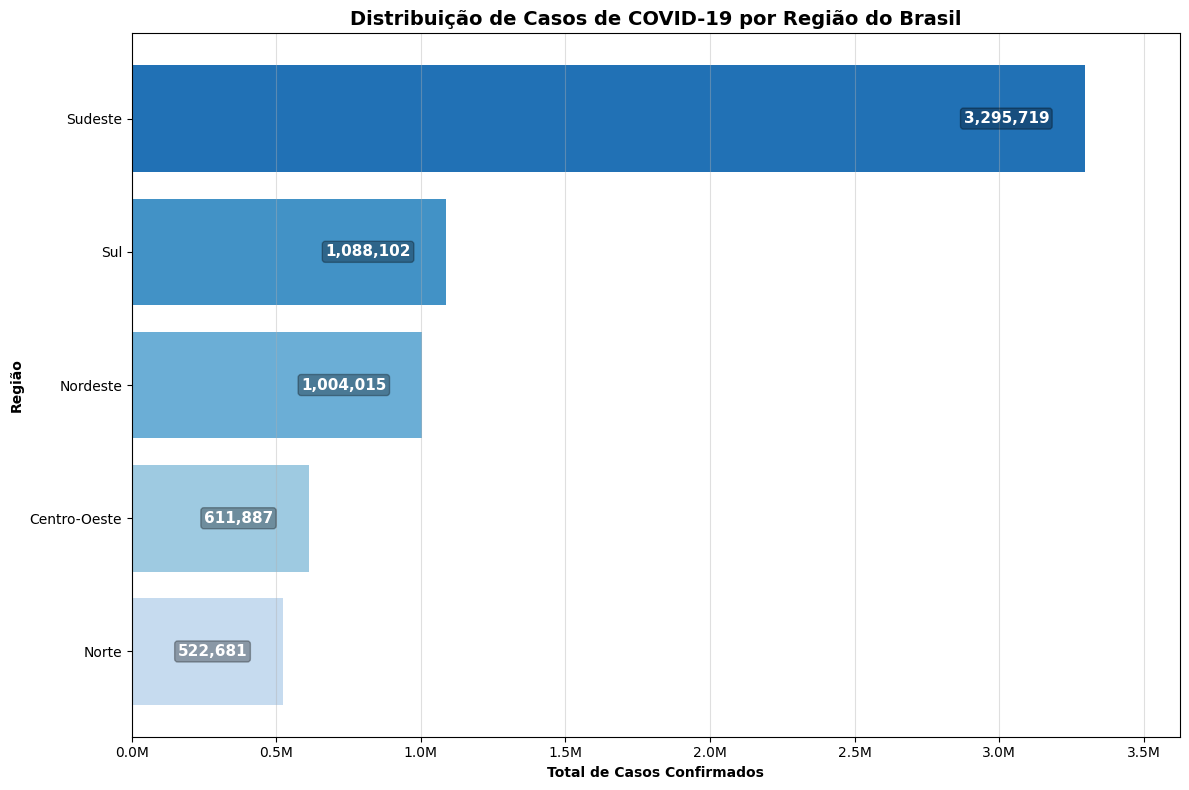

In [ ]:
plt.figure(figsize=(12, 8))
bars = plt.barh(
    regiao_totals.sort_values().index,
    regiao_totals.sort_values().values,
    color=['#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5']
)

for bar in bars:
    w = bar.get_width()
    plt.text(
        w - 123_000, bar.get_y() + bar.get_height()/2,
        f'{w:,.0f}', ha='right', va='center', fontsize=11, fontweight='bold',
        color='white', bbox=dict(facecolor='black', alpha=0.3, boxstyle='round,pad=0.2')
    )

plt.title('Distribuição de Casos de COVID-19 por Região do Brasil', fontsize=14, fontweight='bold')
plt.xlabel('Total de Casos Confirmados', fontweight='bold')
plt.ylabel('Região', fontweight='bold')
plt.grid(axis='x', alpha=0.4)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.xlim(0, regiao_totals.max() * 1.1)
plt.tight_layout()
plt.show()

In [ ]:
print("Questão geral:  Como evoluiu a pandemia de COVID-19 no Brasil?")

# Valores reais (usando máximo por estado)
real_cases = df.groupby('state')['cases'].max().sum()
real_deaths = df.groupby('state')['deaths'].max().sum()
lethality = (real_deaths / real_cases) * 100

print("\nConclusão:")
print(f"- Total de casos: {real_cases:,}")
print(f"- Total de mortes: {real_deaths:,}")
print(f"- Taxa de letalidade: {lethality:.2f}%")
print("- Forte correlação entre casos e mortes (confirmados)")
print("- Estados mais populosos (SP, MG) foram os mais afetados")
print("- Padrão de crescimento exponencial seguido de ondas")
print("- Sem dados faltantes")

Questão geral:  Como evoluiu a pandemia de COVID-19 no Brasil?

Conclusão:
- Total de casos: 16,083,258.0
- Total de mortes: 449,068
- Taxa de letalidade: 2.79%
- Forte correlação entre casos e mortes (confirmados)
- Estados mais populosos (SP, MG) foram os mais afetados
- Padrão de crescimento exponencial seguido de ondas
- Sem dados faltantes


In [ ]:
print(f"Data mais recente: {df['date'].max()}")

Data mais recente: 2021-05-23 00:00:00


**CONCLUSÃO:**

A analise revelou que densidade populacional, mobilidade urbana e capacidade do sistema de saude foram fatores cruciais na dispersao e letalidade do virus. Estados com maior infraestrutura medica conseguiram melhores resultados mesmo com alto numero de casos.
Os dados ate maio de 2021 capturam a fase mais critica da pandemia no Brasil, antes do impacto massivo da vacinacao. A segunda onda, impulsionada pela variante Gamma, representou o periodo mais severo da crise sanitaria, expondo vulnerabilidades preexistentes no sistema de saude brasileiro e a importancia de respostas coordenadas frente a emergencias de saude publica.